Dataset: Allegheny County COVID-19 Tests, Cases and Deaths

Our group metric to determine the best neighborhood was health and safety. My submetric is COVID positive test count per neighborhood. This matters when defining safety of a neighborhood because high COVID-19 case rates in certain neighborhoods may indicate reduced health from many factors like reduced access to hospitals, fewer precautions, less vaccinations, or lower access to proper COVID care. Therefore, a lower positivity rate suggests a safer neighborhood in terms of public health.

In this notebook, I’ll clean and analyze COVID test data to identify which Pittsburgh neighborhood had the lowest positivity rate.

Team Member: Gabi Fernandes

Link: https://data.wprdc.org/dataset/allegheny-county-covid-19-tests-cases-and-deaths

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# import and display the data
url = "https://data.wprdc.org/datastore/dump/3869680f-8faa-4e8c-8c01-6aa1309c40ad"
covid = pd.read_csv(url)
covid.head()

,_id,neighborhood_municipality,month,infections,reinfections,total_infections,breakthrough_infections,deaths,breakthrough_deaths,hospitalizations,breakthrough_hospitalizations,pcr_tests,positive_pcr_tests
0,1292413,Allegheny Center (Pittsburgh),2020-03,2,0,2,0,0,0,0,0,11,3
1,1292414,Arlington (Pittsburgh),2020-03,3,0,3,0,0,0,0,0,17,5
2,1292415,Avalon,2020-03,3,0,3,3,0,0,0,0,18,0
3,1292416,Banksville (Pittsburgh),2020-03,3,0,3,0,0,0,0,0,20,2
4,1292417,Ben Avon,2020-03,1,0,1,0,0,0,0,0,8,0


The data is divided into columns that given information on COVID infection. The important columns that we are going to be looking at will be about the neighborhood/municipality and the total infections. I am going to clean the data to remove any undefined or missing neighborhood names and any entries that have zero PCR tests. This will avoid any divide by zero issues when calculating positivity rates for COVID.

In [12]:
# remove the rows without neighborhood name
covid = covid.dropna(subset=['neighborhood_municipality'])

# remove undefined entries
covid = covid[covid['neighborhood_municipality'] != 'Undefined']

# PCR tests should be > 0
covid = covid[covid['pcr_tests'] > 0]

# exclude Pittsburgh neighborhood entries (keep only non-Pittsburgh municipalities)
covid = covid[~covid['neighborhood_municipality'].str.contains(r'\(Pittsburgh\)', case=False, na=False)]

I am going to compute two metrics for each neighborhood in Pittsburgh: 

1) total infections: the sum of all infections across time
2) positivity rates: the positive PCR tests / the total PCR tests

In [13]:
# compute positivity rate
covid['positivity_rate'] = covid['positive_pcr_tests'] / covid['pcr_tests'] * 100

# group by neighborhood and sum up infections, tests, and positives
grouped = covid.groupby('neighborhood_municipality').sum(numeric_only=True)

# reset the index to turn neighborhood back into a column
grouped = grouped.reset_index()

# compute average positivity rate manually
grouped['positivity_rate'] = grouped['positive_pcr_tests'] / grouped['pcr_tests'] * 100

# sort by total infections
sorted_infections = grouped.sort_values(by='infections', ascending=False)

print('Top 10 Neighborhoods by COVID-19 Infections:')
print(sorted_infections.head(10))


Top 10 Neighborhoods by COVID-19 Infections:
    neighborhood_municipality       _id  infections  reinfections  \
84                 Penn Hills  49272461       10358           865   
9                 Bethel Park  49271099        8755           592   
73              Mount Lebanon  49272368        8329           509   
95                       Ross  49273818        8131           523   
71                Monroeville  49272180        8046           661   
72                       Moon  49270163        6997           488   
66                 McCandless  49273905        6894           439   
101                    Shaler  49273343        6696           454   
89                       Plum  49273709        6526           508   
3             Baldwin Borough  49268834        6142           493   

     total_infections  breakthrough_infections  deaths  breakthrough_deaths  \
84              11223                     3980     127                   23   
9                9347                

To visualize this data better, I will display a bar chart for the top 10 neighborhoods with the highest total infections and a bar chart with the overall positivity rates. 

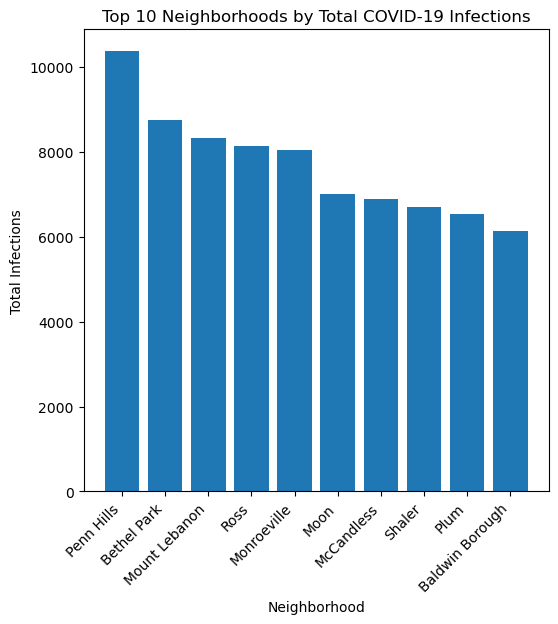

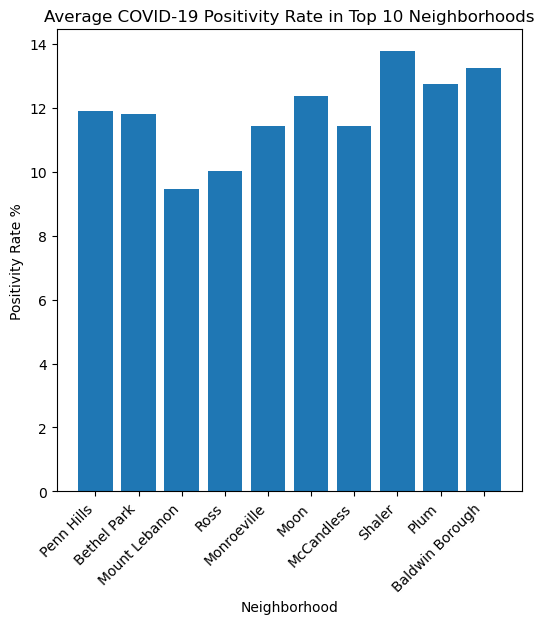

In [14]:
top10 = sorted_infections.head(10)

# top 10 neighborhoods with the most infections
plt.figure(figsize=(6,6))
plt.bar(top10['neighborhood_municipality'], top10['infections'])
plt.title('Top 10 Neighborhoods by Total COVID-19 Infections')
plt.xlabel('Neighborhood')
plt.ylabel('Total Infections')
plt.xticks(rotation=45, ha='right')
plt.show()

# positivity rates for the top 10 neighborhoods
plt.figure(figsize=(6,6))
plt.bar(top10['neighborhood_municipality'], top10['positivity_rate'])
plt.title('Average COVID-19 Positivity Rate in Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Positivity Rate %')
plt.xticks(rotation=45, ha='right')
plt.show()

The neighborhoods at the top of the chart had the highest total infections meaning they were the most impacted during the pandemic. Looking at the positivity rates adds context - a higher rate means that more community spread occured. This sub metric shows how public health can reflect neighborhood health and safety and will be combined with 911 and crime data in our team's full safety score. 

To get a better idea of which neighborhoods have the best health and safety, we will have to evaluate the data in the opposite way - get the neighborhoods with the LOWEST total infections and lowest positivity rates. I will now take the data and produce two charts with this information so that it can be compared with the other submetrics of my team members to determine the best neighborhood in terms of health and safety.

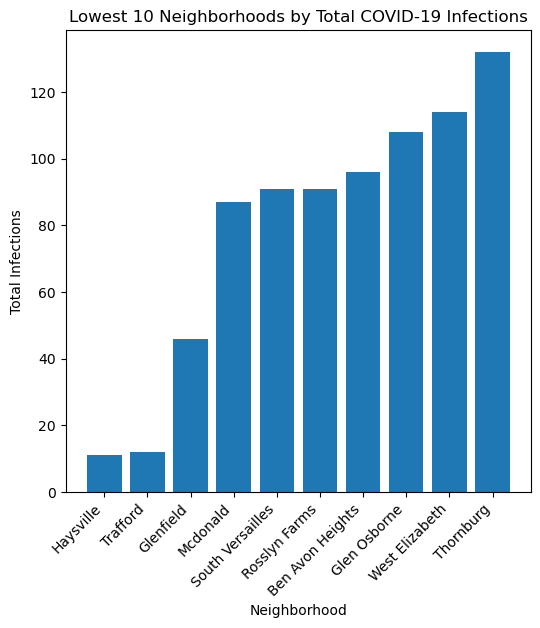

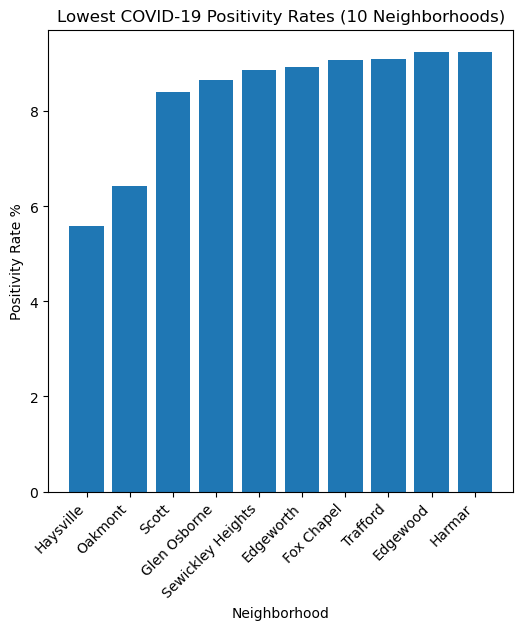

In [15]:
# lowest 10 neighborhoods by total infections and positivity rate

# bottom 10 by total infections
bottom10_infections = grouped.sort_values(by='infections', ascending=True).head(10)

plt.figure(figsize=(6,6))
plt.bar(bottom10_infections['neighborhood_municipality'], bottom10_infections['infections'])
plt.title('Lowest 10 Neighborhoods by Total COVID-19 Infections')
plt.xlabel('Neighborhood')
plt.ylabel('Total Infections')
plt.xticks(rotation=45, ha='right')
plt.show()

# bottom 10 by positivity rate
bottom10_rate = grouped.sort_values(by='positivity_rate', ascending=True).head(10)

plt.figure(figsize=(6,6))
plt.bar(bottom10_rate['neighborhood_municipality'], bottom10_rate['positivity_rate'])
plt.title('Lowest COVID-19 Positivity Rates (10 Neighborhoods)')
plt.xlabel('Neighborhood')
plt.ylabel('Positivity Rate %')
plt.xticks(rotation=45, ha='right')
plt.show()
